# Airfoil DNA project

This mini-project finds its source in ["Machine Learning Transformed the Porsche 919 Hybrid Evo" article](https://newsroom.porsche.com/en/porsche-digital/porsche-digital-919-hybrid-evo-technology-machine-learning-josef-dubsky-christos-pashias.html) and is about implementing the first step explained in the article. <br>
<br>This article has been written by Josef Dubsky, Optimization Methods Virtual Vehicle at Porsche and Dr. Christos Pashias, Manager Motorsport Aerodynamic Prototype Development at Porsche.

![airfoil_dna.jpg](https://github.com/vrona/Airfoil-DNA/raw/master/airfoil_dna.jpg?raw=true)

## Goal

**Extraction of “airfoil DNA” from a dataset of airfoils.**

Abstract
<blockquote>
"Each of possible airfoils can be described only by a relatively small number of design parameter (refers as “airfoil genes” in the genuine article, "only 5 to 10 depending on desired precision").
The optimal combination of these genes helps to find the right airfoil design for a specific range of use."
<\blockquote>

Details<blockquote>
"Using Machine Learning for decisions."<br>
<br>"This is when we decided to use some of the machine learning algorithms to help us first with the choice of the correct design parameters. Similar like in picture processing, one can use the database of available airfoils (in our case about ~1600 airfoils, m-selig.ae.illinois.edu) and train the machine learning models with these (so-called dimensionality reduction). After this analysis, it turns out, that something like an "airfoil DNA" can be extracted from all the data and that each of possible airfoils can be described only by a relatively small number of "airfoil genes" (only 5 to 10 depending on desired precision). Therefore, if an engineer is looking for an optimal airfoil, it is enough only just to vary these few "airfoil genes".<br>
<br>
Once we could describe any possible airfoil with only just a few design parameters, the question was, how to find the best one. That is a typical optimization problem. Just to illustrate the complexity — if we describe each of the 2 airfoils with 5 design parameters, and if we also consider the relative position of the 2 wing segments and their size ratio as an optimization criterium, then together with the unknown flap angle in the opened position, we end up with altogether 15 design parameters. If we vary these design parameters only in e.g. 5 steps, calculate all the combinations and select the best one, we would need to analyze ~30 billion — each under multiple operating conditions. That is clearly not a feasible solution and still the resolution of only 5 steps per design parameter is extremely coarse.<br>
<br>
We used the algorithms, that mimic the evolution process of the organisms in the nature and lead to the “fittest” one."<br>
Therefore, also at this stage, optimization algorithms have to be used. Here again, we used the algorithms, that mimic the evolution process of the organisms in the nature and lead to the “fittest” one. Thanks to this, the optimum could be found only by analyzing hundreds to a few thousands of designs."<br>
<br>source: ["Machine Learning Transformed the Porsche 919 Hybrid Evo" article](https://newsroom.porsche.com/en/porsche-digital/porsche-digital-919-hybrid-evo-technology-machine-learning-josef-dubsky-christos-pashias.html)  <\blockquote>

 ## Database
Available here: https://m-selig.ae.illinois.edu/ads/coord_database.html).<br>

Coordinates of ~1600 airfoils in <span style="color:red">.dat </span> files which contains datas in the form of selig format.

### Understanding of airfoil data information 
(source: [Airfoil Tools Index](http://airfoiltools.com/airfoil/index))<br>


#### Dat file parsing
The .dat files is parsed using the rules below.

1. The file is read a line at a time starting from the top. Blank lines are discarded.
2. The first line is the name or description of the airfoil
3. All subsequent lines must have 2 numeric values separated by white space characters
4. The X coordinate should be in the range 0.0 to 1.0. In practice some files contain values slightly out of this range. So, any X value in the range -0.01 to 1.01 is included in the data (with a warning shown if the values are outside the range 0.0 to 1.0).
5. The Y coordinate must be in the range -1.0 to +1.0.

In [1]:
# Examples of files name aka airfoil name.
import glob
import os

print("Examples of files name:\n")
for i, filename in zip(range(5), glob.glob('/Users/mikehatchi/vrona/Project_Airfoil/coord_seligFmt/*.dat')):
    print(os.path.basename(os.path.normpath(filename)))

Examples of files name:

naca64a210.dat
goe611.dat
naca651212.dat
goe177.dat
ag44ct02r.dat


### Zoom in the data

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

afa18_coor = pd.read_csv('/Users/mikehatchi/vrona/Project_Airfoil/coord_seligFmt/a18.dat') # , skiprows = 1
afnaca64_coor = pd.read_csv('/Users/mikehatchi/vrona/Project_Airfoil/coord_seligFmt/naca64a210.dat')

# Display a description of the dataset
print("Description of A18 airfoil (a18.dat)")
display(afa18_coor.describe())

print("Description of NACA64a210 airfoil (naca64a210.dat)")
display(afnaca64_coor.describe())

Description of A18 airfoil (a18.dat)


,A18 (original)
count,41
unique,41
top,0.30000 0.08383
freq,1


Description of NACA64a210 airfoil (naca64a210.dat)


,NACA 64A210
count,51
unique,51
top,0.02613 -0.01473
freq,1


### Look at the coordinates

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# af_coor = pd.read_csv('/Users/mikehatchi/vrona/Project_Airfoil/coord_seligFmt/a18.dat') # , skiprows = 1
print("A18 coordinates\n", afa18_coor, "\n")
# print("NACA 64A210 coordinates\n", afnaca64_coor)

A18 coordinates
 [[1.000e+00 6.140e-03]
 [9.500e-01 1.817e-02]
 [9.000e-01 2.858e-02]
 [8.000e-01 4.624e-02]
 [7.000e-01 6.056e-02]
 [6.000e-01 7.197e-02]
 [5.500e-01 7.612e-02]
 [5.000e-01 7.975e-02]
 [4.500e-01 8.293e-02]
 [4.000e-01 8.376e-02]
 [3.500e-01 8.466e-02]
 [3.000e-01 8.383e-02]
 [2.500e-01 8.065e-02]
 [2.000e-01 7.601e-02]
 [1.500e-01 7.026e-02]
 [1.000e-01 6.234e-02]
 [7.500e-02 5.660e-02]
 [5.000e-02 4.923e-02]
 [2.500e-02 3.947e-02]
 [1.250e-02 3.239e-02]
 [0.000e+00 1.865e-02]
 [1.250e-02 7.810e-03]
 [2.500e-02 3.570e-03]
 [5.000e-02 7.500e-04]
 [7.500e-02 0.000e+00]
 [1.000e-01 6.000e-05]
 [1.500e-01 2.000e-03]
 [2.000e-01 4.750e-03]
 [2.500e-01 8.060e-03]
 [3.000e-01 1.038e-02]
 [3.500e-01 1.353e-02]
 [4.000e-01 1.657e-02]
 [4.500e-01 1.780e-02]
 [5.000e-01 1.884e-02]
 [5.500e-01 1.980e-02]
 [6.000e-01 1.998e-02]
 [7.000e-01 1.924e-02]
 [8.000e-01 1.452e-02]
 [9.000e-01 8.130e-03]
 [9.500e-01 4.340e-03]
 [1.000e+00 0.000e+00]] 



### Plotting the A18 airfoil coordinates

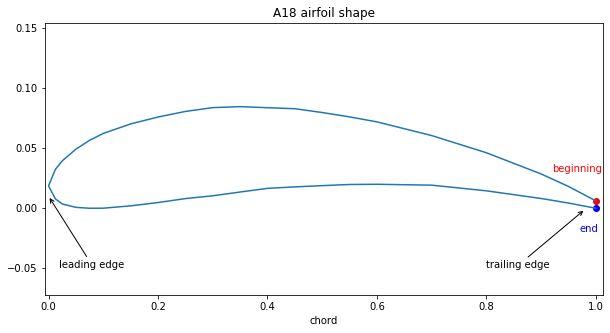

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

afa18_coor = np.loadtxt('/Users/mikehatchi/vrona/Project_Airfoil/coord_seligFmt/a18.dat', skiprows = 1)

plt.figure(figsize=(10,5))
# plt.ylim(0,1)
X = afa18_coor[:,0]
Y = afa18_coor[:,1]

plt.margins(0.007, 0.8)
plt.plot(X, Y)

plt.title("A18 airfoil shape")
plt.xlabel("chord")
plt.scatter(1.000e+00, 6.140e-03, color ='red')
plt.scatter(1.000e+00, 0.000e+00, color ='blue')
plt.annotate('beginning', xy=(1.000e+00, 6.140e-03), xytext=(0.92, 0.030), color ='red')
plt.annotate('end', xy=(1.000e+00, 0.000e+00), xytext=(0.97, -0.020), color ='blue')

plt.annotate('leading edge', xy=(0.000e+00, 1e-02), xytext=(0.02, -5e-02), arrowprops=dict(arrowstyle='->'))
plt.annotate('trailing edge', xy=(0.9800e+00, -0.1e-02), xytext=(0.8, -5e-02), arrowprops=dict(arrowstyle='->'))

plt.ylim = (-0.02, 0.09)
plt.show()

Airfoil terminology

![500px-Wing_profile_nomenclature.svg.png](https://github.com/vrona/Airfoil-DNA/blob/master/500px-Wing_profile_nomenclature.svg.png?raw=true)


## [WIP]